# Exercises for Introduction to Quantum Computing

Name: Pugazharasu Anancia Devaneyan (s6puanan) <br />
Matriculation number: 3300280

In [1]:
import numpy as np
import qiskit 
import qiskit.circuit.library as circuit
import qiskit.quantum_info as qi
from qiskit import QuantumCircuit, QuantumRegister
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, transpile, execute
import math
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import QFT
from qiskit.providers.aer import Aer

## 1. Multiplication by Quantum Fourier Transform

In this exercise sheet we would like to implement a Quantum multiplier i.e. a Quantum circuit that could multiply two numbers stored in two quantum registers upto modulo $2^{n}$ where $n$ is the number of Qubits in either of the Quantum registers.

a) The position operator acting on the first quantum register is defined as,
$$\hat{x}=\sum_x x|x\rangle\langle x|$$
and the corresponding momentum operator acting on the first is defined to be,
$$\hat{p}_{x} = F^{\dagger}_{x} \hat{x} F_{x}$$
where $F_x \equiv \mathrm{qFT}_x$.
We have two quantum registers,
$$|x \rangle |y \rangle = |x,y \rangle$$
We are to prove that,
$$e^{\mathrm{i} \hat{x} \hat{p}_y}=F_y^{\dagger} e^{\mathrm{i} \hat{x} \hat{y}} F_y$$
We shall first expand out the momentum operator in the L.H.S,
$$e^{\mathrm{i} \hat{x} \hat{p}_y}= e^{\mathrm{i} \hat{x} F^{\dagger}_{y} \hat{y} F_{y}}$$
Since does not act on , we can rewrite this to be,
$$e^{\mathrm{i} \hat{x} \hat{p}_y}= e^{F^{\dagger}_{y}(\mathrm{i} \hat{x} \hat{y})F_{y}}$$
We know that,
$$e^{P.A.P^{-1}} = Pe^{A}P^{-1}$$
where $A$ is some square matrix and $P$ is an invertible matrix. We see that this identity is exactly what we need, substituting $A = \mathrm{i} \hat{x} \hat{y}$ and $P = F^{\dagger}_{y}$, we have
$$e^{\mathrm{i} \hat{x} \hat{p}_y}=F_y^{\dagger} e^{\mathrm{i} \hat{x} \hat{y}} F_y$$
Hence, proved.

b) We are to show that,
$$e^{ixy} = \prod^{n}_{k,l =1}e^{ix_{k} y_{l} 2^{n-k-l}}$$
Let's begin by writing down $x$ and $y$ in their binary representations
$$x = \sum^{k=1}_{n}x_{k} 2^{n-k}$$
$$y = \sum^{l=1}_{n}y_{l} 2^{n-l}$$
thus, we have,
$$e^{ixy} = e^{i \sum^{n}_{k,l=1}x_{k} 2^{n-k}.y_{l} 2^{n-l}}$$
$$e^{ixy} = e^{i \sum^{n}_{l,k}x_{k} y_{l} 2^{n-k-l}}$$
$$e^{ixy} = \prod^{n}_{k,l =1}e^{ix_{k} y_{l} 2^{n-k-l}}$$
Hence, proven.

c) Using the previous results, we are to show that,
$$e^{\frac{2 \pi \mathrm{i} \hat{x} \hat{p}_y}{2^n}}|x, y\rangle=\left|x, x+y \quad \bmod 2^n\right\rangle$$
using the result from (a) let us rewrite the L.H.S,
$$e^{\frac{2 \pi \mathrm{i} \hat{x} \hat{p}_y}{2^n}}|x, y\rangle = F_y^{\dagger} e^{\frac{2 \pi \mathrm{i} \hat{x} \hat{y}}{2^n}} F_y|x, y\rangle$$
acting with $F_y$ on $|x, y\rangle$, we get,
$$e^{\frac{2 \pi \mathrm{i} \hat{x} \hat{p}_y}{2^n}}|x, y\rangle =  \frac{F_y^{\dagger}}{2^{\frac{n}{2}}}\sum^{n}_{k=1} e^{\frac{2 \pi \mathrm{i} \hat{x} \hat{k}}{2^n}} e^{\frac{2 \pi i ky}{2^{n}}}|x, k\rangle$$
from (b) we know that this can then be written as,
$$e^{\frac{2 \pi \mathrm{i} \hat{x} \hat{p}_y}{2^n}}|x, y\rangle =  \frac{F_y^{\dagger}}{2^{\frac{n}{2}}}\sum^{n}_{k=1} e^{\frac{2 \pi \mathrm{i} \hat{x} \hat{k}}{2^n}} e^{\frac{2 \pi i k(x+y)}{2^{n}}}|x, k\rangle$$
now we apply the inverse Fourier transform to get,
$$e^{\frac{2 \pi \mathrm{i} \hat{x} \hat{p}_y}{2^n}}|x, y\rangle = \frac{1}{2^{n}} \sum^{2^{n}-1}_{k,m=0} e^{\frac{2 \pi i k[(x+y)-m]}{2^{n}}} | m \rangle$$
we use the identity,
$$\delta_{b,c} = \frac{1}{N} \sum^{N}_{j=1} e^{\frac{2 \pi i j.(b-c)}{N}}$$
Thus we have,
$$e^{\frac{2 \pi \mathrm{i} \hat{x} \hat{p}_y}{2^n}}|x, y\rangle=\left|x, x+y \quad \bmod 2^n\right\rangle$$

d) Now, we shall consider three quantum registers |x⟩, |y⟩, and |z⟩ with $n$ qubits each. We shall attempt to construct a multiply add operation of the form,
$$|x, y, z\rangle \rightarrow\left|x, y, z+x y \bmod 2^n\right\rangle$$
First, we need to construct a circuit that multiplies $x$ and $y$ ($mod 2^{n}$). We know that multiplying $x$ by $y$ simply implies that, we are adding x to itself y times. Thus, a multiplier circuit is simply a quantum adder circuit between the state $| 0 \rangle$ and $|x\rangle$ performed iteratively $y$ times (this is implemented either by adding a controlled not between the $|y\rangle$ state and the adder for every iteration and decrementing after each iteration or via controlled weighted addition). The addition of $z$ to the product can then be implmented via an adder circuit, let us prove this now, we saw from (c), that the addition operation can be represented via,
$$e^{\frac{2 \pi \mathrm{i} \hat{x} \hat{p}_y}{2^n}}|x, y\rangle=\left|x, x+y \bmod 2^n\right\rangle$$
to multiply $x$ and $y$, we simply do,
$${(e^{\frac{2 \pi \mathrm{i} \hat{x} \hat{p}_2}{2^n}})}^{y} |x,0,z \rangle = |x,xy,z \rangle$$
Where the $0$ here actual stands for ${|0\rangle}^{\otimes n}$ i.e. we have initialized the second register i.e. the accumulator to be in the $|0 \rangle$ state. The second register now contains the product $xy \bmod 2^n$. The addition with $z$ can then be written in the form,
$$e^{\frac{2 \pi \mathrm{i} \hat{y} \hat{p}_z}{2^n}} {(e^{\frac{2 \pi \mathrm{i} \hat{x} \hat{p}_2}{2^n}})}^{y}|x,0,z\rangle = \left|x, xy, z+x y \bmod 2^n\right\rangle$$

e) We shall now implement this multiply-add operation in Qiskit.

In [24]:
ccp = circuit.UGate(0.1,0,0).control(2, ctrl_state="11")

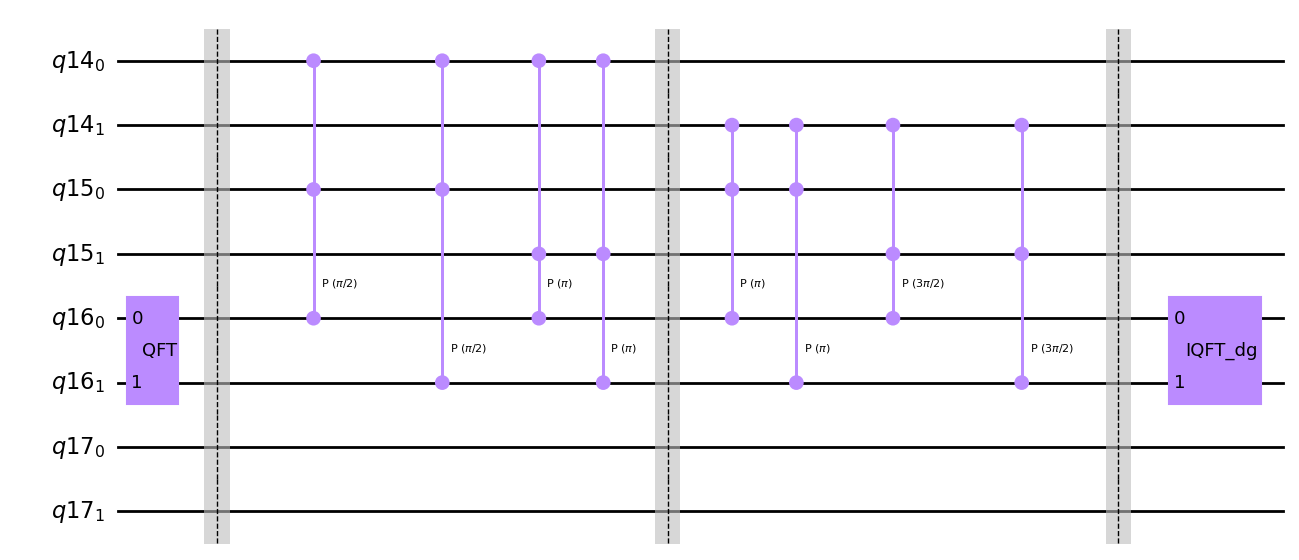

In [12]:
n = 2 #number of qubits in one register

x = QuantumRegister(n)
y = QuantumRegister(n)
ancilla = QuantumRegister(n)
z = QuantumRegister(n)

qc = QuantumCircuit(x,y,ancilla,z)

param = np.pi

ccp = circuit.PhaseGate(param).control(2, ctrl_state="11")



qc.compose(QFT(n, inverse=False, do_swaps=True), [3*n-i for i in range(n,0,-1)], inplace=True)
qc.barrier()

for i in range(n):
    for j in range(n):
        for k in range(n):
            param = (2*np.pi*((3*n)-3-(int(i)+int(j)+int(k))))/(2**(n))
            ccp = circuit.PhaseGate(param).control(2, ctrl_state="11")
            qc.append(ccp, [x[i],y[j],ancilla[k]])
    qc.barrier()

qc.compose(QFT(n, inverse=True,do_swaps=True), [3*n-i for i in range(n,0,-1)], inplace=True)

qc.draw('mpl')

In [8]:
state_2 = qi.Statevector.from_label('000101')
state_2 = state_2.evolve(qc)
(state_2.draw(output='latex'))

<IPython.core.display.Latex object>